#Class_Assignment_BRSM

In [1]:
!pip install  openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


/tmp/ipykernel_469600/2200693214.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_excel('Hypothesis testing data.xlsx',sheet_name='Sheet1')


column_names = df.columns.tolist()
print(column_names)
new_df=df[[ 'GPA', 'IQ', 'GENDER', 'TESTSCORE',  'Exerice_Times', 'Exercise code', 'Anxiety']]
new_df=new_df.head(38)



['Unnamed: 0', 'GPA', 'IQ', 'GENDER', 'TESTSCORE', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Exerice_Times', 'Exercise code', 'Anxiety']


In [4]:
print(np.array(new_df['Anxiety']))

[21. 11. 12. 28. 16. 25. 16. 13. 18. 13. 16. 12. 11. 21. 16. 12. 25. 12.
 14. 21. 19. 18. 20. 24. 21. 13. 18. 18. 12. 29. 21.  8. 11. 18. 30. 27.
 13. 17.]


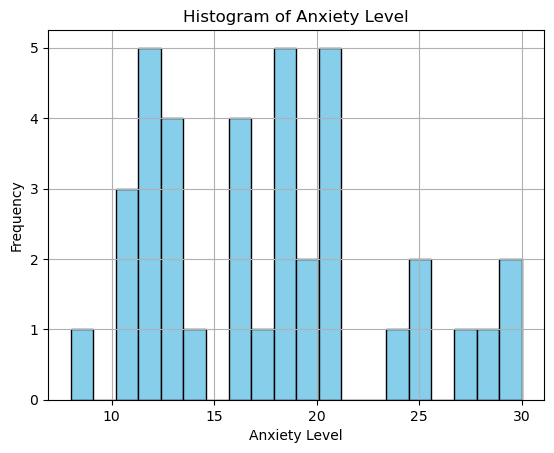

In [5]:
plt.hist(new_df['Anxiety'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Anxiety Level')
plt.ylabel('Frequency')
plt.title('Histogram of Anxiety Level')
plt.grid(True)
plt.show()


Exercise 0 - Shapiro-Wilk Test - Test Statistic: 0.8759722709655762
Exercise 0 - Shapiro-Wilk Test - p-value: 0.033602725714445114
Exercise 1 - Shapiro-Wilk Test - Test Statistic: 0.9671563506126404
Exercise 1 - Shapiro-Wilk Test - p-value: 0.6453604698181152


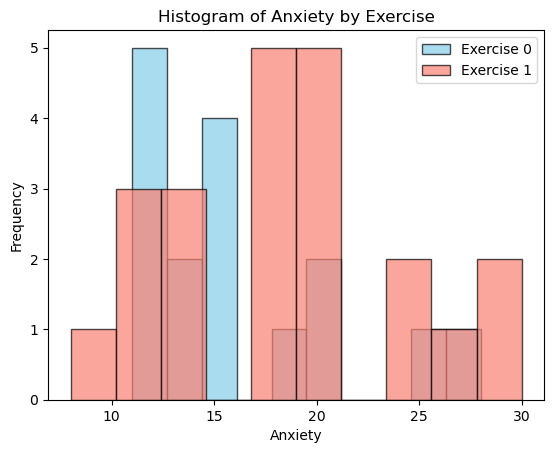

In [6]:

import scipy.stats as stats
df = new_df

exercise_0 = df[df['Exercise code'] == 0]['Anxiety']
exercise_1 = df[df['Exercise code'] == 1]['Anxiety']

shapiro_test_statistic_0, shapiro_p_value_0 = stats.shapiro(exercise_0)
shapiro_test_statistic_1, shapiro_p_value_1 = stats.shapiro(exercise_1)

print("Exercise 0 - Shapiro-Wilk Test - Test Statistic:", shapiro_test_statistic_0)
print("Exercise 0 - Shapiro-Wilk Test - p-value:", shapiro_p_value_0)
print("Exercise 1 - Shapiro-Wilk Test - Test Statistic:", shapiro_test_statistic_1)
print("Exercise 1 - Shapiro-Wilk Test - p-value:", shapiro_p_value_1)

plt.hist(exercise_0, bins=10, color='skyblue', edgecolor='black', alpha=0.7, label='Exercise 0')
plt.hist(exercise_1, bins=10, color='salmon', edgecolor='black', alpha=0.7, label='Exercise 1')
plt.xlabel('Anxiety')
plt.ylabel('Frequency')
plt.title('Histogram of Anxiety by Exercise')
plt.legend()
plt.show()


In [7]:
import pandas as pd
import scipy.stats as stats

# Calculate the t-test statistic and p-value for the two groups
t_statistic, p_value = stats.ttest_ind(exercise_0, exercise_1)

# Print the results of the t-test
print("T-test results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject null hypothesis: There is a statistically significant difference in anxiety levels between the two exercise groups.")
else:
    print("Fail to reject null hypothesis: There is no statistically significant difference in anxiety levels between the two exercise groups.")


T-test results:
t-statistic: -1.2340391041699919
p-value: 0.2251840038960404
Fail to reject null hypothesis: There is no statistically significant difference in anxiety levels between the two exercise groups.


In [8]:
mean_0 = exercise_0.mean()
mean_1 = exercise_1.mean()
var_0 = exercise_0.var()
var_1 = exercise_1.var()
n_0 = len(exercise_0)
n_1 = len(exercise_1)

t_value = (mean_1 - mean_0) / np.sqrt((var_1 / n_1) + (var_0 / n_0))

print("Manually calculated t-value:", t_value)

Manually calculated t-value: 1.2641769525105269


In [9]:
s_pooled = np.sqrt(((n_0 - 1) * var_0 + (n_1 - 1) * var_1) / (n_0 + n_1 - 2))

effect_size = (mean_1 - mean_0) / s_pooled

print("Effect size (Cohen's d):", effect_size)


Effect size (Cohen's d): 0.40546128123209063



The p-value we got is higher than what we need to be sure there's a real difference in anxiety levels between the two groups.

The t-value we found (1.23) shows there's a bit of a difference in anxiety levels between the groups, but we can't say for sure if it's a big deal or just random.

Cohen's d value (0.4) means there's a noticeable difference in anxiety levels between the groups, but it might not be a huge difference that matters a lot in real life.